# Exploratory Data Analysis (EDA)

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
# Initialize an empty list to store DataFrames
dataframes = []

# Loop through the years 2008 to 2023
for year in range(2008, 2024):
    # Construct the file path for the current year
    file_path = f"../data/train_{year}.parquet"
    
    # Read the Parquet file into a DataFrame and append it to the list
    try:
        df = pd.read_parquet(file_path)
        dataframes.append(df)
    except Exception as e:
        print(f"Failed to read file {file_path}: {e}")

# Concatenate all DataFrames into a single DataFrame
if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)
    print(f"Total rows in the combined DataFrame: {len(combined_df)}")
else:
    print("No files were successfully read.")

Total rows in the combined DataFrame: 3926058


In [45]:
combined_df['customer_id'].nunique()

106179

In [46]:
combined_df.columns

Index(['Id', 'customer_id', 'interest_rate', 'name', 'country',
       'date_of_birth', 'address', 'date', 'atm_transfer_in',
       'atm_transfer_out', 'bank_transfer_in', 'bank_transfer_out',
       'crypto_in', 'crypto_out', 'bank_transfer_in_volume',
       'bank_transfer_out_volume', 'crypto_in_volume', 'crypto_out_volume',
       'complaints', 'touchpoints', 'csat_scores', 'tenure', 'from_competitor',
       'job', 'churn_due_to_fraud', 'model_predicted_fraud'],
      dtype='object')

In [47]:
# Step 1: Get the most recent date in the dataset
max_date = combined_df['date'].max()

# Step 2: Group by customer_id to get the latest event date for each customer
latest_event = combined_df.groupby('customer_id')['date'].max().reset_index()

# Step 3: Calculate churn condition
# A customer is considered churned if their last event is older than 12 months from max_date
latest_event['churn'] = latest_event['date'] < (max_date - pd.DateOffset(months=12))

# Step 4: Merge this back into the original dataframe
combined_df = pd.merge(combined_df, latest_event[['customer_id', 'churn']], on='customer_id', how='left')

# Now, the combined_df will have the new 'churn' column
combined_df.head()

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,...,crypto_out_volume,complaints,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud,churn
0,1,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-17,0,0,...,220.900654,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,Amenity horticulturist,False,False,True
1,6,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-18,0,0,...,221.147296,0,[],"{'appointment': None, 'email': None, 'phone': ...",1,False,Amenity horticulturist,False,False,True
2,16,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-19,0,0,...,260.510535,0,[],"{'appointment': None, 'email': None, 'phone': ...",2,False,Amenity horticulturist,False,False,True
3,31,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-20,0,0,...,203.214128,0,[],"{'appointment': None, 'email': None, 'phone': ...",3,False,Amenity horticulturist,False,False,True
4,50,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-21,0,0,...,207.894467,0,"[whatsapp, email, email]","{'appointment': None, 'email': None, 'phone': ...",4,False,Amenity horticulturist,False,False,True


In [48]:
# Count the number of distinct customer_ids where churn is True or False
churn_true_count = combined_df[combined_df['churn'] == True]['customer_id'].nunique()
churn_false_count = combined_df[combined_df['churn'] == False]['customer_id'].nunique()

print(f"Number of distinct customers with churn = True: {churn_true_count}")
print(f"Number of distinct customers with churn = False: {churn_false_count}")

Number of distinct customers with churn = True: 25340
Number of distinct customers with churn = False: 80839


In [49]:
combined_df[combined_df['churn'] == True]

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,...,crypto_out_volume,complaints,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud,churn
0,1,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-17,0,0,...,220.900654,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,Amenity horticulturist,False,False,True
1,6,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-18,0,0,...,221.147296,0,[],"{'appointment': None, 'email': None, 'phone': ...",1,False,Amenity horticulturist,False,False,True
2,16,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-19,0,0,...,260.510535,0,[],"{'appointment': None, 'email': None, 'phone': ...",2,False,Amenity horticulturist,False,False,True
3,31,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-20,0,0,...,203.214128,0,[],"{'appointment': None, 'email': None, 'phone': ...",3,False,Amenity horticulturist,False,False,True
4,50,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-21,0,0,...,207.894467,0,"[whatsapp, email, email]","{'appointment': None, 'email': None, 'phone': ...",4,False,Amenity horticulturist,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518346,3866558,91149,0.0,Christopher Campbell,Greece,1945-11-09,"6965 Eric Gateway Suite 070\nKnightmouth, WI 2...",2022-12-29,0,0,...,12.823833,0,"[phone, appointment, whatsapp]","{'appointment': 6.0, 'email': None, 'phone': N...",0,False,Retail merchandiser,False,False,True
3518382,3867709,91165,0.0,Jerome Anderson,USA,1963-11-07,"9048 Delgado Glens\nSandersstad, MA 28503",2022-12-30,0,0,...,15.206299,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,Cartographer,False,False,True
3518412,3867726,91182,0.0,Heidi Murray,Poland,1959-06-26,"54945 Huynh Walk Apt. 085\nEast Christopher, V...",2022-12-30,0,0,...,12.513630,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,"Engineer, control and instrumentation",False,False,True
3518416,3867729,91185,0.0,Isaac Mendoza,Finland,1954-09-25,41054 Lisa Falls Apt. 595\nLake Heatherborough...,2022-12-30,0,0,...,14.423995,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,Conference centre manager,False,False,True


# Example Churn member: customer_id = 1

In [50]:
combined_df[combined_df['customer_id'] == 2]

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,...,crypto_out_volume,complaints,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud,churn
26,2,2,3.5,Bonnie Carr,Greece,1947-05-27,00867 Dominguez Camp Apt. 575\nPort Josephland...,2008-01-17,1,0,...,15.558941,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,Exhibition designer,False,False,True
27,7,2,3.5,Bonnie Carr,Greece,1947-05-27,00867 Dominguez Camp Apt. 575\nPort Josephland...,2008-01-18,1,0,...,13.976574,0,[],"{'appointment': None, 'email': None, 'phone': ...",1,False,Exhibition designer,False,False,True
28,17,2,3.5,Bonnie Carr,Greece,1947-05-27,00867 Dominguez Camp Apt. 575\nPort Josephland...,2008-01-19,1,0,...,15.684373,0,[],"{'appointment': None, 'email': None, 'phone': ...",2,False,Exhibition designer,False,False,True
29,32,2,3.5,Bonnie Carr,Greece,1947-05-27,00867 Dominguez Camp Apt. 575\nPort Josephland...,2008-01-20,1,0,...,16.196797,0,[],"{'appointment': None, 'email': None, 'phone': ...",3,False,Exhibition designer,False,False,True
30,51,2,3.5,Bonnie Carr,Greece,1947-05-27,00867 Dominguez Camp Apt. 575\nPort Josephland...,2008-01-21,1,0,...,16.684812,0,[],"{'appointment': None, 'email': None, 'phone': ...",4,False,Exhibition designer,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129388,200809,2,2.8,Bonnie Carr,Greece,1947-05-27,00867 Dominguez Camp Apt. 575\nPort Josephland...,2010-06-18,0,0,...,12.909152,0,[],"{'appointment': None, 'email': None, 'phone': ...",883,False,Exhibition designer,False,False,True
129389,201222,2,2.8,Bonnie Carr,Greece,1947-05-27,00867 Dominguez Camp Apt. 575\nPort Josephland...,2010-06-19,0,0,...,14.861998,0,[],"{'appointment': None, 'email': None, 'phone': ...",884,False,Exhibition designer,False,False,True
129390,201633,2,2.8,Bonnie Carr,Greece,1947-05-27,00867 Dominguez Camp Apt. 575\nPort Josephland...,2010-06-20,0,0,...,14.388623,0,[],"{'appointment': None, 'email': None, 'phone': ...",885,False,Exhibition designer,False,False,True
129391,202055,2,2.8,Bonnie Carr,Greece,1947-05-27,00867 Dominguez Camp Apt. 575\nPort Josephland...,2010-06-21,0,0,...,14.889768,0,[],"{'appointment': None, 'email': None, 'phone': ...",886,False,Exhibition designer,False,False,True


In [51]:
min(combined_df[combined_df['customer_id'] == 1]['date'])

Timestamp('2008-01-17 00:00:00')

In [52]:
max(combined_df[combined_df['customer_id'] == 1]['date'])

Timestamp('2022-10-28 00:00:00')

/var/folders/t9/rsz5g5h51js2dn6lzhrr7x1r0000gn/T/ipykernel_70867/4279099414.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['total_in'] = customer_data['atm_transfer_in'] + customer_data['bank_transfer_in'] + customer_data['crypto_in']
/var/folders/t9/rsz5g5h51js2dn6lzhrr7x1r0000gn/T/ipykernel_70867/4279099414.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['total_out'] = customer_data['atm_transfer_out'] + customer_data['bank_transfer_out'] + customer_data['crypto_out']


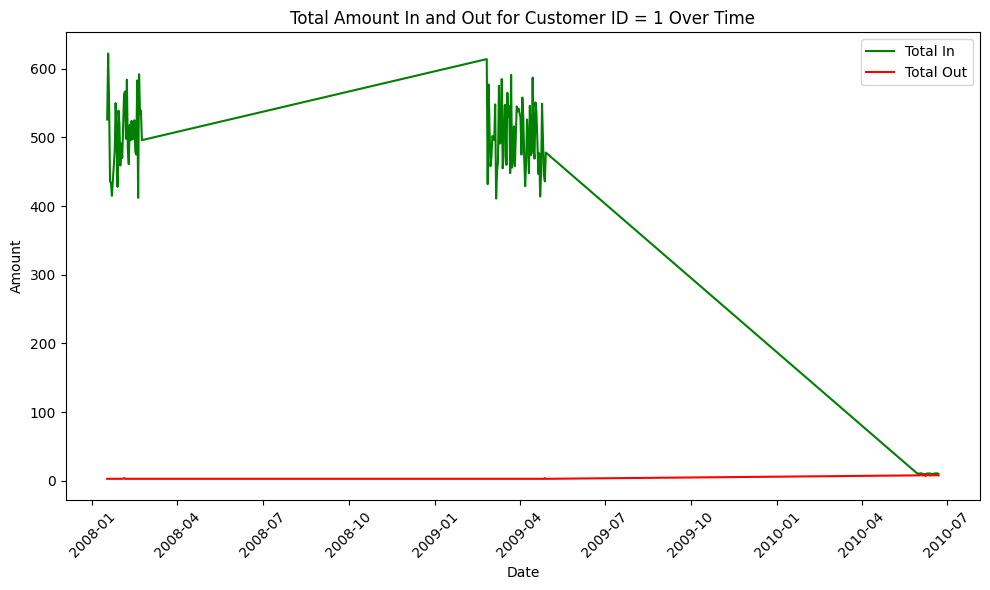

In [53]:
# Filter the DataFrame for customer_id = 1
customer_data = combined_df[combined_df['customer_id'] == 2]

# Calculate the total amount in and out over time
customer_data['total_in'] = customer_data['atm_transfer_in'] + customer_data['bank_transfer_in'] + customer_data['crypto_in']
customer_data['total_out'] = customer_data['atm_transfer_out'] + customer_data['bank_transfer_out'] + customer_data['crypto_out']

# Group by date to sum the total in and out amounts per day
daily_data = customer_data.groupby('date')[['total_in', 'total_out']].sum()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(daily_data.index, daily_data['total_in'], label='Total In', color='green')
plt.plot(daily_data.index, daily_data['total_out'], label='Total Out', color='red')

# Add labels and title
plt.title('Total Amount In and Out for Customer ID = 1 Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [54]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926058 entries, 0 to 3926057
Data columns (total 27 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Id                        int64         
 1   customer_id               int64         
 2   interest_rate             float64       
 3   name                      object        
 4   country                   object        
 5   date_of_birth             object        
 6   address                   object        
 7   date                      datetime64[ns]
 8   atm_transfer_in           int64         
 9   atm_transfer_out          int64         
 10  bank_transfer_in          int64         
 11  bank_transfer_out         int64         
 12  crypto_in                 int64         
 13  crypto_out                int64         
 14  bank_transfer_in_volume   float64       
 15  bank_transfer_out_volume  float64       
 16  crypto_in_volume          float64       
 17  crypto_o

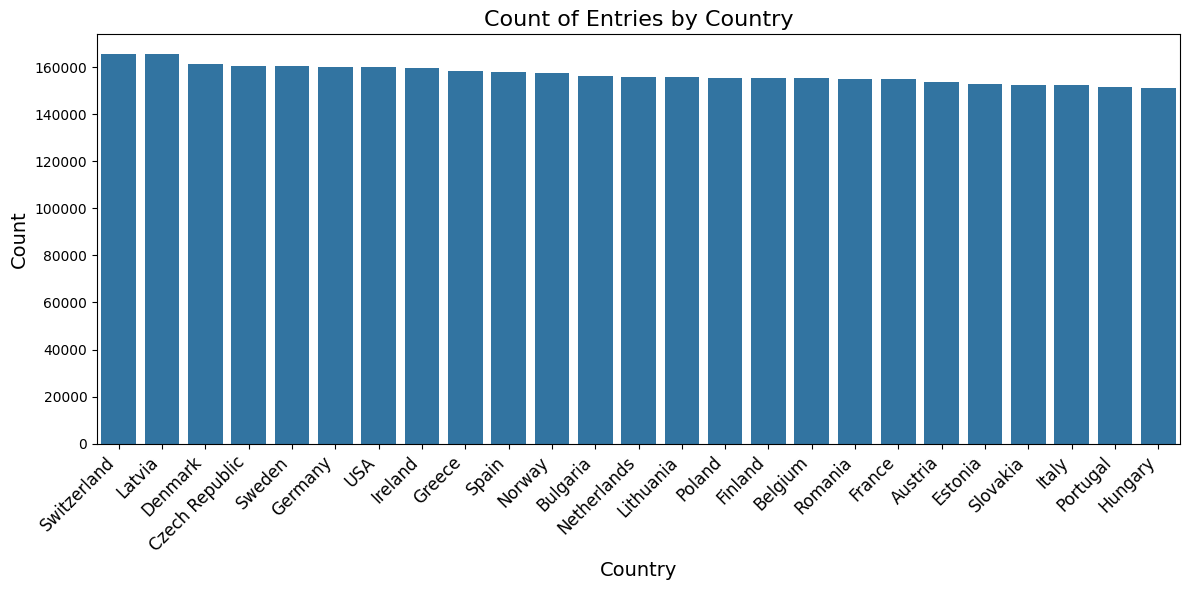

In [55]:
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_df, x='country', order=combined_df['country'].value_counts().index)
plt.title('Count of Entries by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

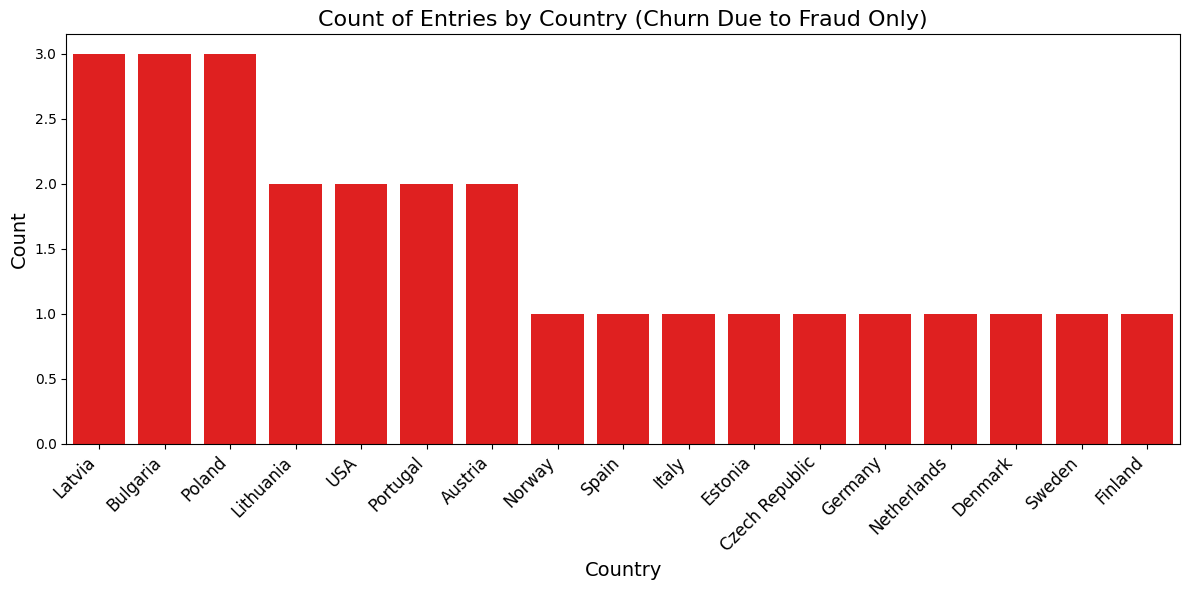

In [56]:
# Filter the DataFrame to include only rows where churn_due_to_fraud is True
churn_true_df = combined_df[combined_df['churn_due_to_fraud'] == True]

# Set up the figure
plt.figure(figsize=(12, 6))

# Create the countplot for filtered data
sns.countplot(
    data=churn_true_df,
    x='country',
    order=churn_true_df['country'].value_counts().index,
    color='red'  # Color the bars red
)

# Add title and labels
plt.title('Count of Entries by Country (Churn Due to Fraud Only)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [57]:
combined_df[combined_df["customer_id"] == 3367]

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,...,crypto_out_volume,complaints,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud,churn
126613,132080,3367,3.2,Thomas Raymond,Spain,1976-04-12,"21415 Scott Valley\nWest Carloshaven, OK 18182...",2009-11-20,0,0,...,12.460099,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,TEFL teacher,False,False,True
126614,132339,3367,3.2,Thomas Raymond,Spain,1976-04-12,"21415 Scott Valley\nWest Carloshaven, OK 18182...",2009-11-21,0,0,...,12.927123,0,[],"{'appointment': None, 'email': None, 'phone': ...",1,False,TEFL teacher,False,False,True
126615,132602,3367,3.2,Thomas Raymond,Spain,1976-04-12,"21415 Scott Valley\nWest Carloshaven, OK 18182...",2009-11-22,0,0,...,13.494967,0,[],"{'appointment': None, 'email': None, 'phone': ...",2,False,TEFL teacher,False,False,True
126616,132864,3367,3.2,Thomas Raymond,Spain,1976-04-12,"21415 Scott Valley\nWest Carloshaven, OK 18182...",2009-11-23,0,0,...,11.944376,0,[],"{'appointment': None, 'email': None, 'phone': ...",3,False,TEFL teacher,False,False,True
126617,133124,3367,3.2,Thomas Raymond,Spain,1976-04-12,"21415 Scott Valley\nWest Carloshaven, OK 18182...",2009-11-24,0,0,...,12.933862,0,"[appointment, whatsapp]","{'appointment': None, 'email': None, 'phone': ...",4,False,TEFL teacher,False,False,True
126618,133384,3367,3.2,Thomas Raymond,Spain,1976-04-12,"21415 Scott Valley\nWest Carloshaven, OK 18182...",2009-11-25,0,0,...,11.125694,0,"[appointment, appointment]","{'appointment': None, 'email': None, 'phone': ...",5,False,TEFL teacher,False,False,True
126619,133641,3367,3.2,Thomas Raymond,Spain,1976-04-12,"21415 Scott Valley\nWest Carloshaven, OK 18182...",2009-11-26,0,0,...,15.784232,0,[],"{'appointment': None, 'email': None, 'phone': ...",6,False,TEFL teacher,False,False,True
126620,133894,3367,3.2,Thomas Raymond,Spain,1976-04-12,"21415 Scott Valley\nWest Carloshaven, OK 18182...",2009-11-27,0,0,...,12.976402,0,[],"{'appointment': None, 'email': None, 'phone': ...",7,False,TEFL teacher,False,False,True
126621,134144,3367,3.2,Thomas Raymond,Spain,1976-04-12,"21415 Scott Valley\nWest Carloshaven, OK 18182...",2009-11-28,0,0,...,13.644540,0,"[whatsapp, email, email]","{'appointment': None, 'email': 5.0, 'phone': N...",8,False,TEFL teacher,False,False,True
126622,134385,3367,3.2,Thomas Raymond,Spain,1976-04-12,"21415 Scott Valley\nWest Carloshaven, OK 18182...",2009-11-29,0,0,...,12.290679,0,[],"{'appointment': None, 'email': None, 'phone': ...",9,False,TEFL teacher,False,False,True


In [58]:
max(combined_df["date"])

Timestamp('2023-12-31 00:00:00')

In [59]:
print(df.isnull().sum())

Id                          0
customer_id                 0
interest_rate               0
name                        0
country                     0
date_of_birth               0
address                     0
date                        0
atm_transfer_in             0
atm_transfer_out            0
bank_transfer_in            0
bank_transfer_out           0
crypto_in                   0
crypto_out                  0
bank_transfer_in_volume     0
bank_transfer_out_volume    0
crypto_in_volume            0
crypto_out_volume           0
complaints                  0
touchpoints                 0
csat_scores                 0
tenure                      0
from_competitor             0
job                         0
churn_due_to_fraud          0
model_predicted_fraud       0
dtype: int64


In [60]:
df.head()

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,...,crypto_in_volume,crypto_out_volume,complaints,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud
0,3868940,5,2.5,Emily Solis,Netherlands,2006-06-30,"664 Brown Rapid\nBrianburgh, MN 10337 Netherlands",2023-01-01,0,0,...,179.001527,64.326489,0,[],"{'appointment': None, 'email': None, 'phone': ...",5463,False,Occupational hygienist,False,False
1,3870140,5,2.5,Emily Solis,Netherlands,2006-06-30,"664 Brown Rapid\nBrianburgh, MN 10337 Netherlands",2023-01-02,0,0,...,178.277805,64.081651,0,[],"{'appointment': None, 'email': None, 'phone': ...",5464,False,Occupational hygienist,False,False
2,3871324,5,2.5,Emily Solis,Netherlands,2006-06-30,"664 Brown Rapid\nBrianburgh, MN 10337 Netherlands",2023-01-03,0,0,...,156.228806,62.867531,0,"[appointment, whatsapp]","{'appointment': None, 'email': None, 'phone': ...",5465,False,Occupational hygienist,False,False
3,3872515,5,2.5,Emily Solis,Netherlands,2006-06-30,"664 Brown Rapid\nBrianburgh, MN 10337 Netherlands",2023-01-04,0,0,...,153.801324,65.039384,0,[],"{'appointment': None, 'email': None, 'phone': ...",5466,False,Occupational hygienist,False,False
4,3873696,5,2.5,Emily Solis,Netherlands,2006-06-30,"664 Brown Rapid\nBrianburgh, MN 10337 Netherlands",2023-01-05,0,0,...,172.491017,54.875766,0,[],"{'appointment': None, 'email': None, 'phone': ...",5467,False,Occupational hygienist,False,False


In [61]:
df.columns

Index(['Id', 'customer_id', 'interest_rate', 'name', 'country',
       'date_of_birth', 'address', 'date', 'atm_transfer_in',
       'atm_transfer_out', 'bank_transfer_in', 'bank_transfer_out',
       'crypto_in', 'crypto_out', 'bank_transfer_in_volume',
       'bank_transfer_out_volume', 'crypto_in_volume', 'crypto_out_volume',
       'complaints', 'touchpoints', 'csat_scores', 'tenure', 'from_competitor',
       'job', 'churn_due_to_fraud', 'model_predicted_fraud'],
      dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407605 entries, 0 to 407604
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Id                        407605 non-null  int64         
 1   customer_id               407605 non-null  int64         
 2   interest_rate             407605 non-null  float64       
 3   name                      407605 non-null  object        
 4   country                   407605 non-null  object        
 5   date_of_birth             407605 non-null  object        
 6   address                   407605 non-null  object        
 7   date                      407605 non-null  datetime64[ns]
 8   atm_transfer_in           407605 non-null  int64         
 9   atm_transfer_out          407605 non-null  int64         
 10  bank_transfer_in          407605 non-null  int64         
 11  bank_transfer_out         407605 non-null  int64         
 12  cr

In [63]:
df.describe()

,Id,customer_id,interest_rate,date,atm_transfer_in,atm_transfer_out,bank_transfer_in,bank_transfer_out,crypto_in,crypto_out,bank_transfer_in_volume,bank_transfer_out_volume,crypto_in_volume,crypto_out_volume,complaints,tenure
count,4.076050e+05,407605.000000,407605.0,407605,407605.000000,407605.000000,407605.000000,407605.000000,407605.000000,407605.000000,407605.000000,407605.000000,407605.000000,407605.000000,407605.000000,407605.000000
mean,4.091030e+06,68587.637853,2.5,2023-07-02 20:55:43.648876288,0.160786,0.176831,1727.744081,1347.855497,13.796681,4.568722,3019.818161,2161.732796,178.977368,84.478050,0.020601,939.905202
min,3.868940e+06,5.000000,2.5,2023-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.071042,8.186725,3.283762,1.333526,0.000000,0.000000
25%,3.980051e+06,50442.000000,2.5,2023-04-03 00:00:00,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,116.662435,29.035841,44.917010,13.574802,0.000000,368.000000
50%,4.091120e+06,74342.000000,2.5,2023-07-03 00:00:00,0.000000,0.000000,449.000000,4.000000,1.000000,1.000000,947.075295,100.858238,60.588088,18.591522,0.000000,760.000000
75%,4.202014e+06,90487.000000,2.5,2023-10-01 00:00:00,0.000000,0.000000,1974.000000,1304.000000,9.000000,8.000000,2320.162790,330.828029,200.164546,49.494933,0.000000,1178.000000
max,4.312994e+06,106186.000000,2.5,2023-12-31 00:00:00,1724.000000,2058.000000,28062.000000,18132.000000,81.000000,73.000000,39528.455670,34826.611604,2035.282630,1214.428467,3.000000,5821.000000
std,1.281808e+05,26825.879962,0.0,NaN,11.613992,15.213412,2911.317541,2410.232953,21.065859,5.276783,4450.370953,3917.199225,232.489912,131.067896,0.215948,997.011927


In [64]:
len(df[df['churn_due_to_fraud'] == True])

4

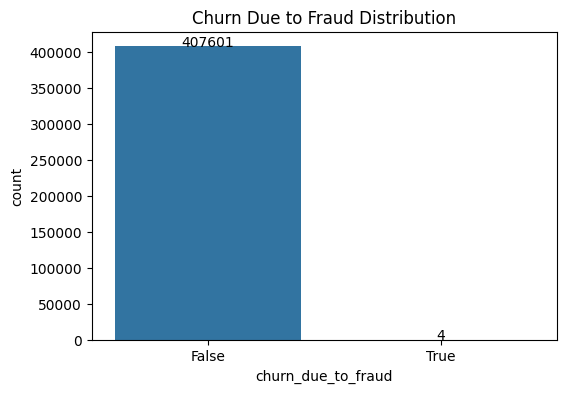

In [65]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='churn_due_to_fraud', data=df)

# Annotate each bar with its count
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 0.5,  # Position above the bar
            int(p.get_height()),  # The count
            ha='center')  # Center align the text

plt.title('Churn Due to Fraud Distribution')
plt.show()

In [66]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()


Correlation Matrix:


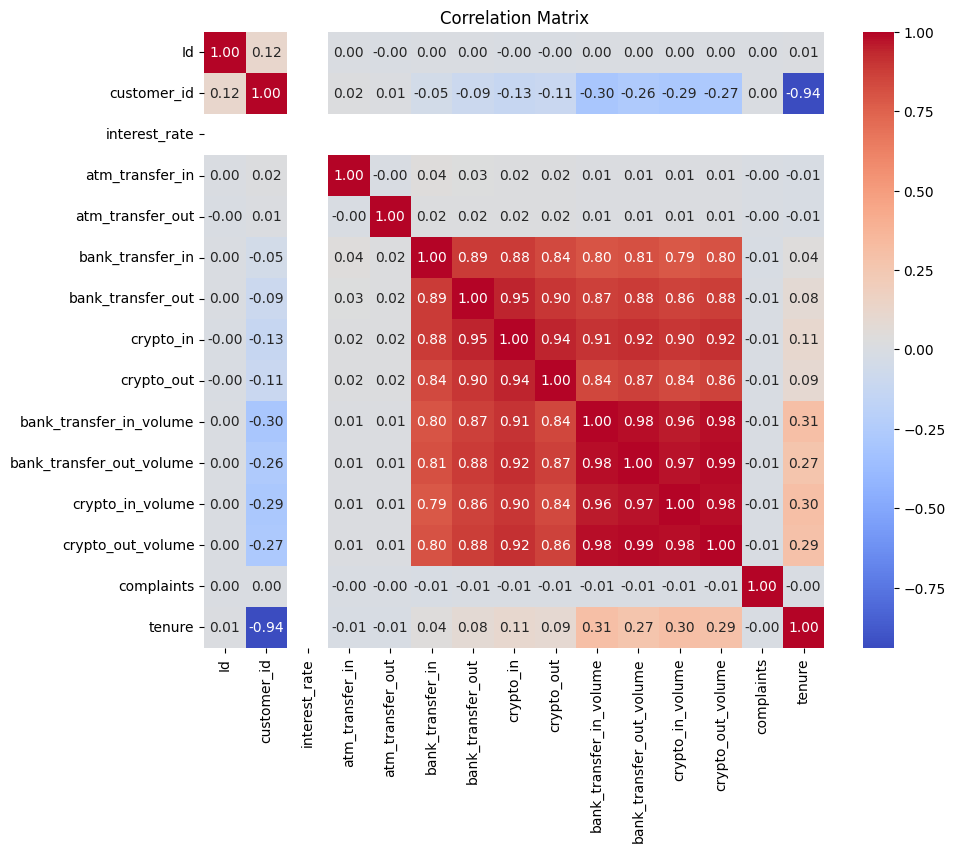

In [67]:
# Correlation matrix for numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()

print("\nCorrelation Matrix:")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [68]:
years = range(2008, 2024)
file_path_pattern = "../data/train_{year}.parquet"

total_churn_due_to_fraud = 0
total_records = 0

for year in years:
    file_path = file_path_pattern.format(year=year)
    try:
        df = pd.read_parquet(file_path)

        year_total_records = len(df)
        total_records += year_total_records

        churn_count = df['churn_due_to_fraud'].sum()
        total_churn_due_to_fraud += churn_count

        print(f"Year {year}: {churn_count} records (Total records: {year_total_records})")
    except Exception as e:
        print(f"Error processing file for year {year}: {e}")

print(f"Total records across all datasets: {total_records}")
print(f"Total records where 'churn_due_to_fraud' is True: {total_churn_due_to_fraud}")

Year 2008: 0 records (Total records: 46510)
Year 2009: 0 records (Total records: 82852)
Year 2010: 1 records (Total records: 129439)
Year 2011: 0 records (Total records: 158736)
Year 2012: 2 records (Total records: 161235)
Year 2013: 0 records (Total records: 188359)
Year 2014: 2 records (Total records: 216988)
Year 2015: 0 records (Total records: 241032)
Year 2016: 5 records (Total records: 257669)
Year 2017: 4 records (Total records: 271686)
Year 2018: 1 records (Total records: 304289)
Year 2019: 3 records (Total records: 533065)
Year 2020: 2 records (Total records: 264256)
Year 2021: 3 records (Total records: 282250)
Year 2022: 0 records (Total records: 380087)
Year 2023: 4 records (Total records: 407605)
Total records across all datasets: 3926058
Total records where 'churn_due_to_fraud' is True: 27


# Feature Engineering

In [69]:
df_features = df.drop(columns=['Id', 'name', 'address'])
df_features['date_of_birth'] = pd.to_datetime(df_features['date_of_birth'])
df_features['date'] = pd.to_datetime(df_features['date'])

### Feature 1: Age

In [70]:
df_features['age'] = (df_features['date'] - df_features['date_of_birth']).dt.days // 365

### Calculate transaction frequencies (how many transactions were made)

In [71]:
df_features['atm_transfer_frequency'] = df_features['atm_transfer_in'] + df_features['atm_transfer_out']
df_features['bank_transfer_frequency'] = df_features['bank_transfer_in'] + df_features['bank_transfer_out']
df_features['crypto_transfer_frequency'] = df_features['crypto_in'] + df_features['crypto_out']

### Calculate ratio of incoming to outgoing transfers

In [72]:
df_features['atm_in_out_ratio'] = df_features['atm_transfer_in'] / (df_features['atm_transfer_out'] + 1)
df_features['bank_in_out_ratio'] = df_features['bank_transfer_in'] / (df_features['bank_transfer_out'] + 1)
df_features['crypto_in_out_ratio'] = df_features['crypto_in'] / (df_features['crypto_out'] + 1)

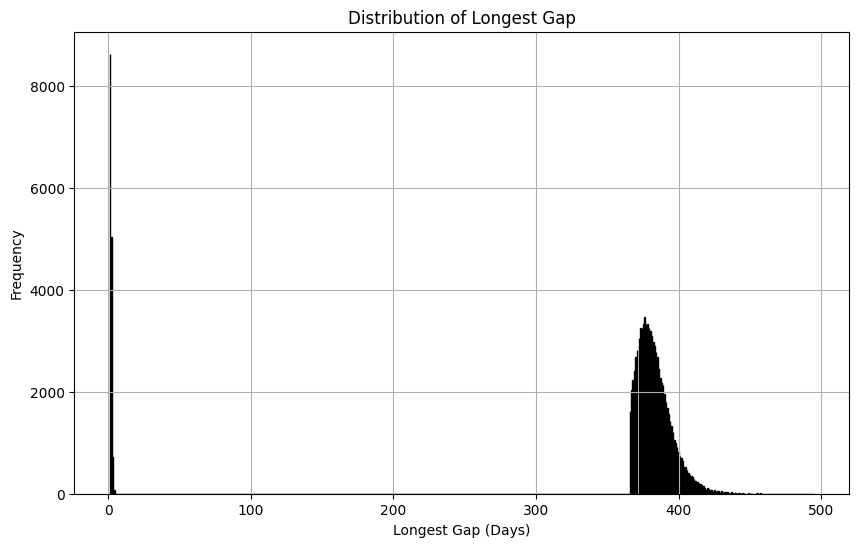

In [73]:
gap_diff_df = combined_df.sort_values(by=['customer_id', 'date'])
gap_diff_df['time_diff'] = gap_diff_df.groupby('customer_id')['date'].diff()
longest_gap = gap_diff_df.groupby('customer_id')['time_diff'].max()

longest_gap_days = longest_gap.dt.total_seconds() / (60 * 60 * 24)  

plt.figure(figsize=(10, 6))
plt.hist(longest_gap_days.dropna(), bins=1000, edgecolor='black', color='skyblue')  
plt.title('Distribution of Longest Gap')
plt.xlabel('Longest Gap (Days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Distribution of ATM Transfer out

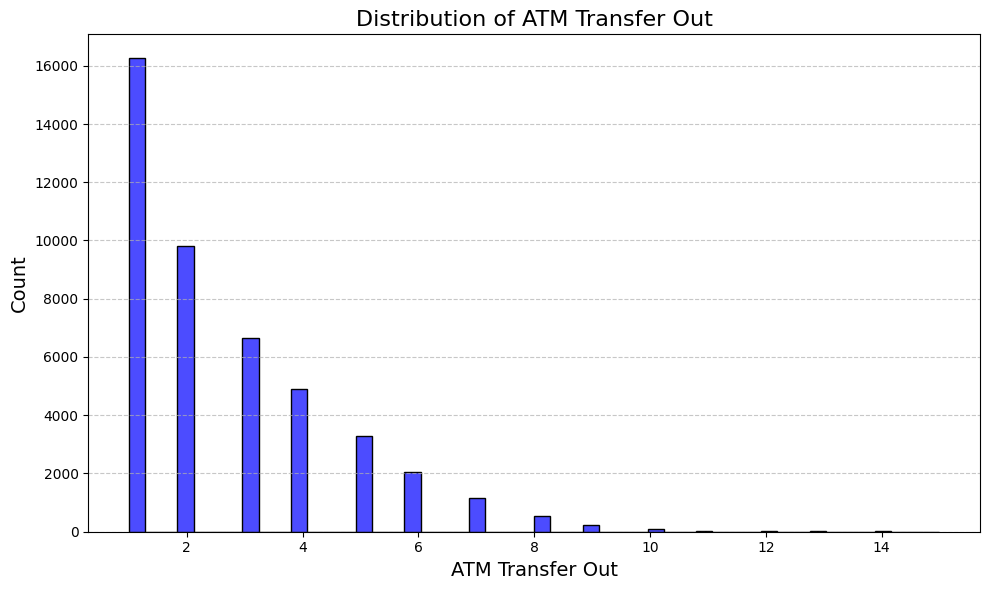

In [74]:
filtered_data = combined_df[(combined_df['atm_transfer_out'] > 0) & (combined_df['atm_transfer_out'] <= 20)]
# filtered_data = combined_df[combined_df['atm_transfer_out'] > 0]


plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['atm_transfer_out'], bins=50, color='blue', edgecolor='black', alpha=0.7)

plt.title('Distribution of ATM Transfer Out', fontsize=16)
plt.xlabel('ATM Transfer Out', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### ATM Transfer In

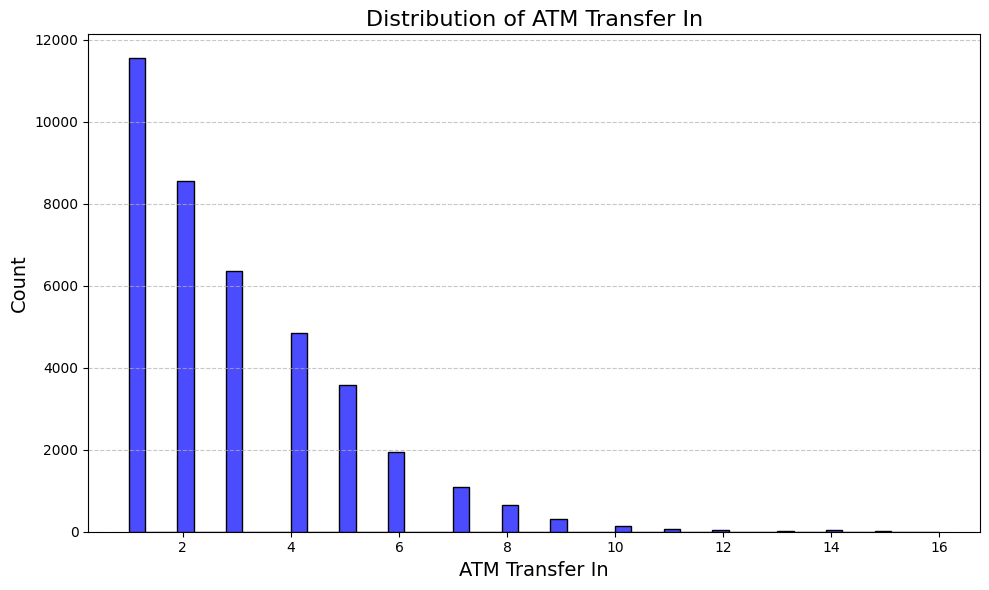

In [75]:
filtered_data = combined_df[(combined_df['atm_transfer_in'] > 0) & (combined_df['atm_transfer_in'] <= 20)]


plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['atm_transfer_in'], bins=50, color='blue', edgecolor='black', alpha=0.7)

plt.title('Distribution of ATM Transfer In', fontsize=16)
plt.xlabel('ATM Transfer In', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Crypto In

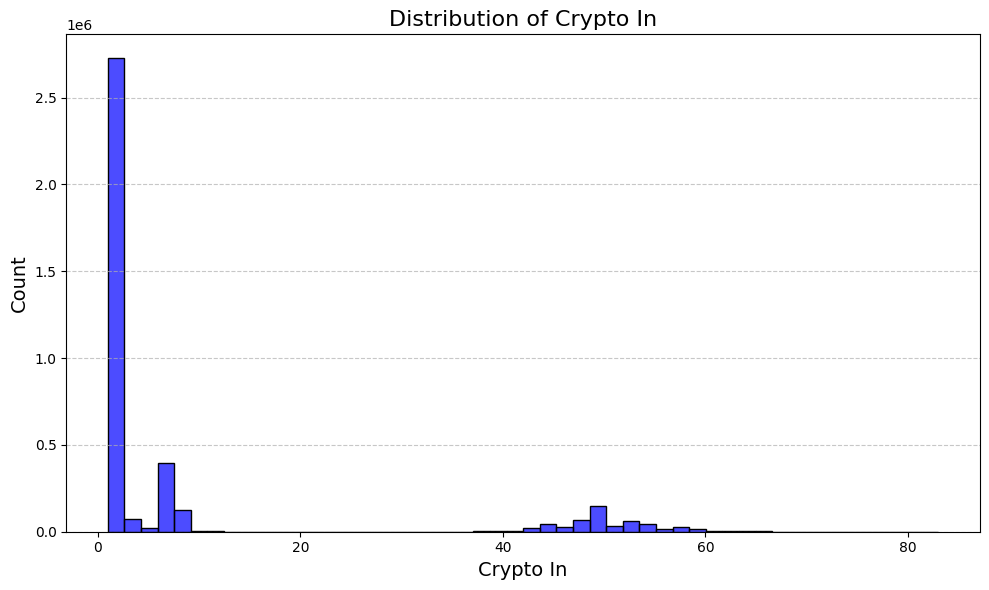

In [76]:
# filtered_data = combined_df[(combined_df['atm_transfer_out'] > 0) & (combined_df['atm_transfer_out'] <= 20)]
filtered_data = combined_df[(combined_df['crypto_in'] > 0) & (combined_df['crypto_in'] <= 100)]


plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['crypto_in'], bins=50, color='blue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Crypto In', fontsize=16)
plt.xlabel('Crypto In', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [77]:
combined_df['crypto_in'].unique()

array([56, 46, 48, 49, 60, 52, 55, 53, 57, 45, 58, 54, 51, 50,  1,  5,  4,
        6,  2,  7,  8,  9,  3, 41, 42, 43, 38, 47, 59, 44, 62, 10, 61, 40,
       64, 63, 75, 39, 71, 23, 21, 25, 24, 22, 20, 27, 28, 26, 29, 19, 18,
       30, 12, 11, 13,  0, 34, 31, 33, 35, 65, 37, 14, 66, 15, 16, 36, 32,
       68, 67, 69, 17, 74, 73, 70, 72, 83, 77, 79, 76, 81, 78, 80])

### Bank Transfer In

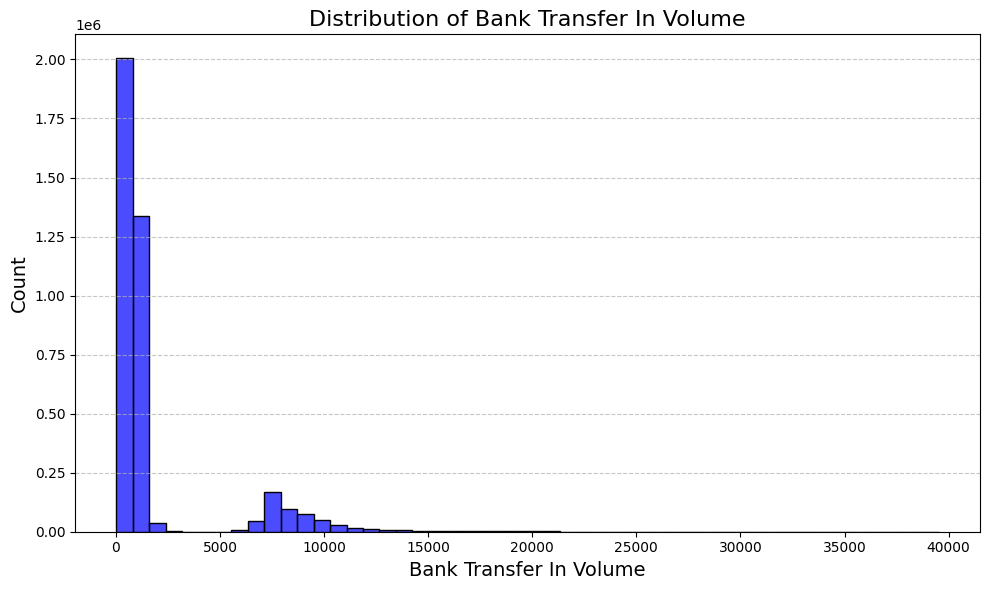

In [78]:
filtered_data = combined_df
# filtered_data = combined_df[(combined_df['bank_transfer_in_volume'] > 0) & (combined_df['crypto_in'] <= 100)]


plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['bank_transfer_in_volume'], bins=50, color='blue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Bank Transfer In Volume', fontsize=16)
plt.xlabel('Bank Transfer In Volume', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [79]:
percentile_98 = np.percentile(combined_df['bank_transfer_in'], 98)

print("98th Percentile:", percentile_98)
print("Max Value:", max(combined_df['bank_transfer_in']))

raw_mean = combined_df['bank_transfer_in'].mean()
print("Raw Mean:", raw_mean)

Q1 = combined_df['bank_transfer_in'].quantile(0.25)
Q3 = combined_df['bank_transfer_in'].quantile(0.75)
IQR = Q3 - Q1

filtered_df = combined_df[
    (combined_df['bank_transfer_in'] >= (Q1 - 1.5 * IQR)) &
    (combined_df['bank_transfer_in'] <= (Q3 + 1.5 * IQR))
]


98th Percentile: 8398.0
Max Value: 34209
Raw Mean: 1187.0160328757242


In [80]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926058 entries, 0 to 3926057
Data columns (total 27 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Id                        int64         
 1   customer_id               int64         
 2   interest_rate             float64       
 3   name                      object        
 4   country                   object        
 5   date_of_birth             object        
 6   address                   object        
 7   date                      datetime64[ns]
 8   atm_transfer_in           int64         
 9   atm_transfer_out          int64         
 10  bank_transfer_in          int64         
 11  bank_transfer_out         int64         
 12  crypto_in                 int64         
 13  crypto_out                int64         
 14  bank_transfer_in_volume   float64       
 15  bank_transfer_out_volume  float64       
 16  crypto_in_volume          float64       
 17  crypto_o

### Job

In [81]:
unemployment_keywords = ["unemployed"]

combined_df['is_unemployed'] = combined_df['job'].str.lower().str.contains('|'.join(unemployment_keywords), na=False)

unemployed_count = combined_df['is_unemployed'].sum()
print(f"Number of unemployed individuals: {unemployed_count}")


Number of unemployed individuals: 349520
